In [167]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jillanisofttech/flight-price-prediction-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\snrpc\.cache\kagglehub\datasets\jillanisofttech\flight-price-prediction-dataset\versions\1


### Import Data

In [168]:
import os

files = os.listdir(path)
print("files in directory", files)

files in directory ['Data_Train.xlsx', 'Test_set.xlsx']


In [169]:
import pandas as pd


csv_file_path = os.path.join(path, "Data_Train.xlsx") 


df = pd.read_excel(csv_file_path)

df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [170]:
df.shape

(10683, 11)

#### READ DATA

In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [172]:
df['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [173]:
df[df["Route"].isnull() | df["Total_Stops"].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [174]:
drop_index = df[df["Route"].isnull() | df["Total_Stops"].isnull()].index
df.drop(drop_index, inplace=True)

In [175]:
df.shape

(10682, 11)

In [176]:
df.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

In [177]:
df['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [178]:
df['Source'].value_counts()

Source
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [179]:
import matplotlib.pyplot as plt
import seaborn as sns


#### STR TO INT

In [180]:
def check_duration(row):
    duration = row["Duration"]  # Süre sütununu al
    index = row.name  # Gerçek index'i al

    # 'h' veya 'm' içermiyorsa hatalı veri olarak işaretle
    if 'h' not in duration and 'm' not in duration:
        print(f"Hatalı veri! Satır index: {index}, Değer: {duration}")
    hours = 0
    minutes = 0

    # Saat bilgisi varsa
    if 'h' in duration:
        hours = int(duration.split('h')[0])  # '2h 50m' → '2' al
        duration = duration.split('h')[1]   # ' 50m' kalır

    # Dakika bilgisi varsa
    if 'm' in duration:
        minutes = int(duration.split('m')[0].strip())  # ' 50m' → '50' al
    return hours * 60 + minutes  # Toplam dakikayı döndür

df["Duration_Int"] = df.apply(check_duration, axis=1)
df


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_Int
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,170
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,445
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,1140
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,325
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,285
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,150
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,155
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,180
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,160


In [181]:
def totalstop(row):
    route = row['Total_Stops']  # Route sütununu al
    index = row.name  # Gerçek index'i al
    
    # Eğer route None, NaN veya boş string ise, hatalı veri olarak işaretle
    if pd.isna(route) or route.strip() == "":
        print(f"Hatalı veri! Satır index: {index}, Değer: {route}")
        return np.nan  # Hatalı veri için NaN döndür
    if route[0]=='n':
        return 0
    else:
        return int(route.split(' ')[0])

df["Total_stops"] = df.apply(totalstop, axis=1)
df


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_Int,Total_stops
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,170,0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,445,2
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,1140,2
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,325,1
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,285,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,150,0
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,155,0
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,180,0
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,160,0


In [182]:
#split date of journey

df['Journey_day'] = df['Date_of_Journey'].apply(lambda x: int(x.split('/')[0]))
df['Journey_month'] = df['Date_of_Journey'].apply(lambda x: int(x.split('/')[1]))
df['Journey_year'] = df['Date_of_Journey'].apply(lambda x: int(x.split('/')[2]))
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Duration_Int,Total_stops,Journey_day,Journey_month,Journey_year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,170,0,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,445,2,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,1140,2,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,325,1,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,285,1,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,150,0,9,4,2019
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,155,0,27,4,2019
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,180,0,27,4,2019
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,160,0,1,3,2019


In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
 11  Duration_Int     10682 non-null  int64 
 12  Total_stops      10682 non-null  int64 
 13  Journey_day      10682 non-null  int64 
 14  Journey_month    10682 non-null  int64 
 15  Journey_year     10682 non-null  int64 
dtypes: int64(6), object(10)
memory usage: 1.4+ MB


In [184]:
df.drop(['Date_of_Journey', 'Duration', 'Total_Stops'], axis=1, inplace=True)
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Additional_Info,Price,Duration_Int,Total_stops,Journey_day,Journey_month,Journey_year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,No info,3897,170,0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,No info,7662,445,2,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,No info,13882,1140,2,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,No info,6218,325,1,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,No info,13302,285,1,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,No info,4107,150,0,9,4,2019
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,No info,4145,155,0,27,4,2019
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,No info,7229,180,0,27,4,2019
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,No info,12648,160,0,1,3,2019


In [185]:
#split arrival time 

df['Arrival_hour'] = df['Arrival_Time'].apply(lambda x: int(x.split(':')[0]))
df['Arrival_min'] = df['Arrival_Time'].apply(lambda x: int(x.split(':')[1] [:2]))
df['Dep_hour'] = df['Dep_Time'].apply(lambda x: int(x.split(':')[0]))
df['Dep_min'] = df['Dep_Time'].apply(lambda x: int(x.split(':')[1] [:2]))
df


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Additional_Info,Price,Duration_Int,Total_stops,Journey_day,Journey_month,Journey_year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,No info,3897,170,0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,No info,7662,445,2,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,No info,13882,1140,2,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,No info,6218,325,1,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,No info,13302,285,1,1,3,2019,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,No info,4107,150,0,9,4,2019,22,25,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,No info,4145,155,0,27,4,2019,23,20,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,No info,7229,180,0,27,4,2019,11,20,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,No info,12648,160,0,1,3,2019,14,10,11,30


In [186]:
df.drop(['Arrival_Time'], axis=1, inplace=True)
df.drop(['Dep_Time'], axis=1, inplace=True)
df

,Airline,Source,Destination,Route,Additional_Info,Price,Duration_Int,Total_stops,Journey_day,Journey_month,Journey_year,Arrival_hour,Arrival_min,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,3897,170,0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,7662,445,2,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,13882,1140,2,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info,6218,325,1,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info,13302,285,1,1,3,2019,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,No info,4107,150,0,9,4,2019,22,25,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,No info,4145,155,0,27,4,2019,23,20,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,No info,7229,180,0,27,4,2019,11,20,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,No info,12648,160,0,1,3,2019,14,10,11,30


In [207]:
len(df['Airline'].unique())

12

In [187]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [188]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [189]:
from sklearn.preprocessing import OneHotEncoder

In [190]:
df.isna().sum()

Airline            0
Source             0
Destination        0
Route              0
Additional_Info    0
Price              0
Duration_Int       0
Total_stops        0
Journey_day        0
Journey_month      0
Journey_year       0
Arrival_hour       0
Arrival_min        0
Dep_hour           0
Dep_min            0
dtype: int64

In [191]:
encoder=OneHotEncoder()
encoder.fit_transform(df[['Airline','Source','Destination']]).toarray()

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [192]:
encoded=pd.DataFrame(encoder.fit_transform(df[['Airline','Source','Destination']]).toarray(), columns=encoder.get_feature_names_out())
encoded

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10678,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10679,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [193]:
df = df.reset_index(drop=True)

In [194]:
newdf = pd.concat([df, encoded], axis=1)
newdf

,Airline,Source,Destination,Route,Additional_Info,Price,Duration_Int,Total_stops,Journey_day,Journey_month,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,BLR → DEL,No info,3897,170,0,24,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,No info,7662,445,2,1,5,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,No info,13882,1140,2,9,6,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,No info,6218,325,1,12,5,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,No info,13302,285,1,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,Air Asia,Kolkata,Banglore,CCU → BLR,No info,4107,150,0,9,4,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10678,Air India,Kolkata,Banglore,CCU → BLR,No info,4145,155,0,27,4,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10679,Jet Airways,Banglore,Delhi,BLR → DEL,No info,7229,180,0,27,4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10680,Vistara,Banglore,New Delhi,BLR → DEL,No info,12648,160,0,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
newdf.drop(['Airline','Route','Source','Destination','Additional_Info'], axis=1, inplace=True)

In [196]:
newdf

,Price,Duration_Int,Total_stops,Journey_day,Journey_month,Journey_year,Arrival_hour,Arrival_min,Dep_hour,Dep_min,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,3897,170,0,24,3,2019,1,10,22,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,7662,445,2,1,5,2019,13,15,5,50,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,13882,1140,2,9,6,2019,4,25,9,25,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,6218,325,1,12,5,2019,23,30,18,5,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,13302,285,1,1,3,2019,21,35,16,50,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10677,4107,150,0,9,4,2019,22,25,19,55,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10678,4145,155,0,27,4,2019,23,20,20,45,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10679,7229,180,0,27,4,2019,11,20,8,20,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10680,12648,160,0,1,3,2019,14,10,11,30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


<Axes: >

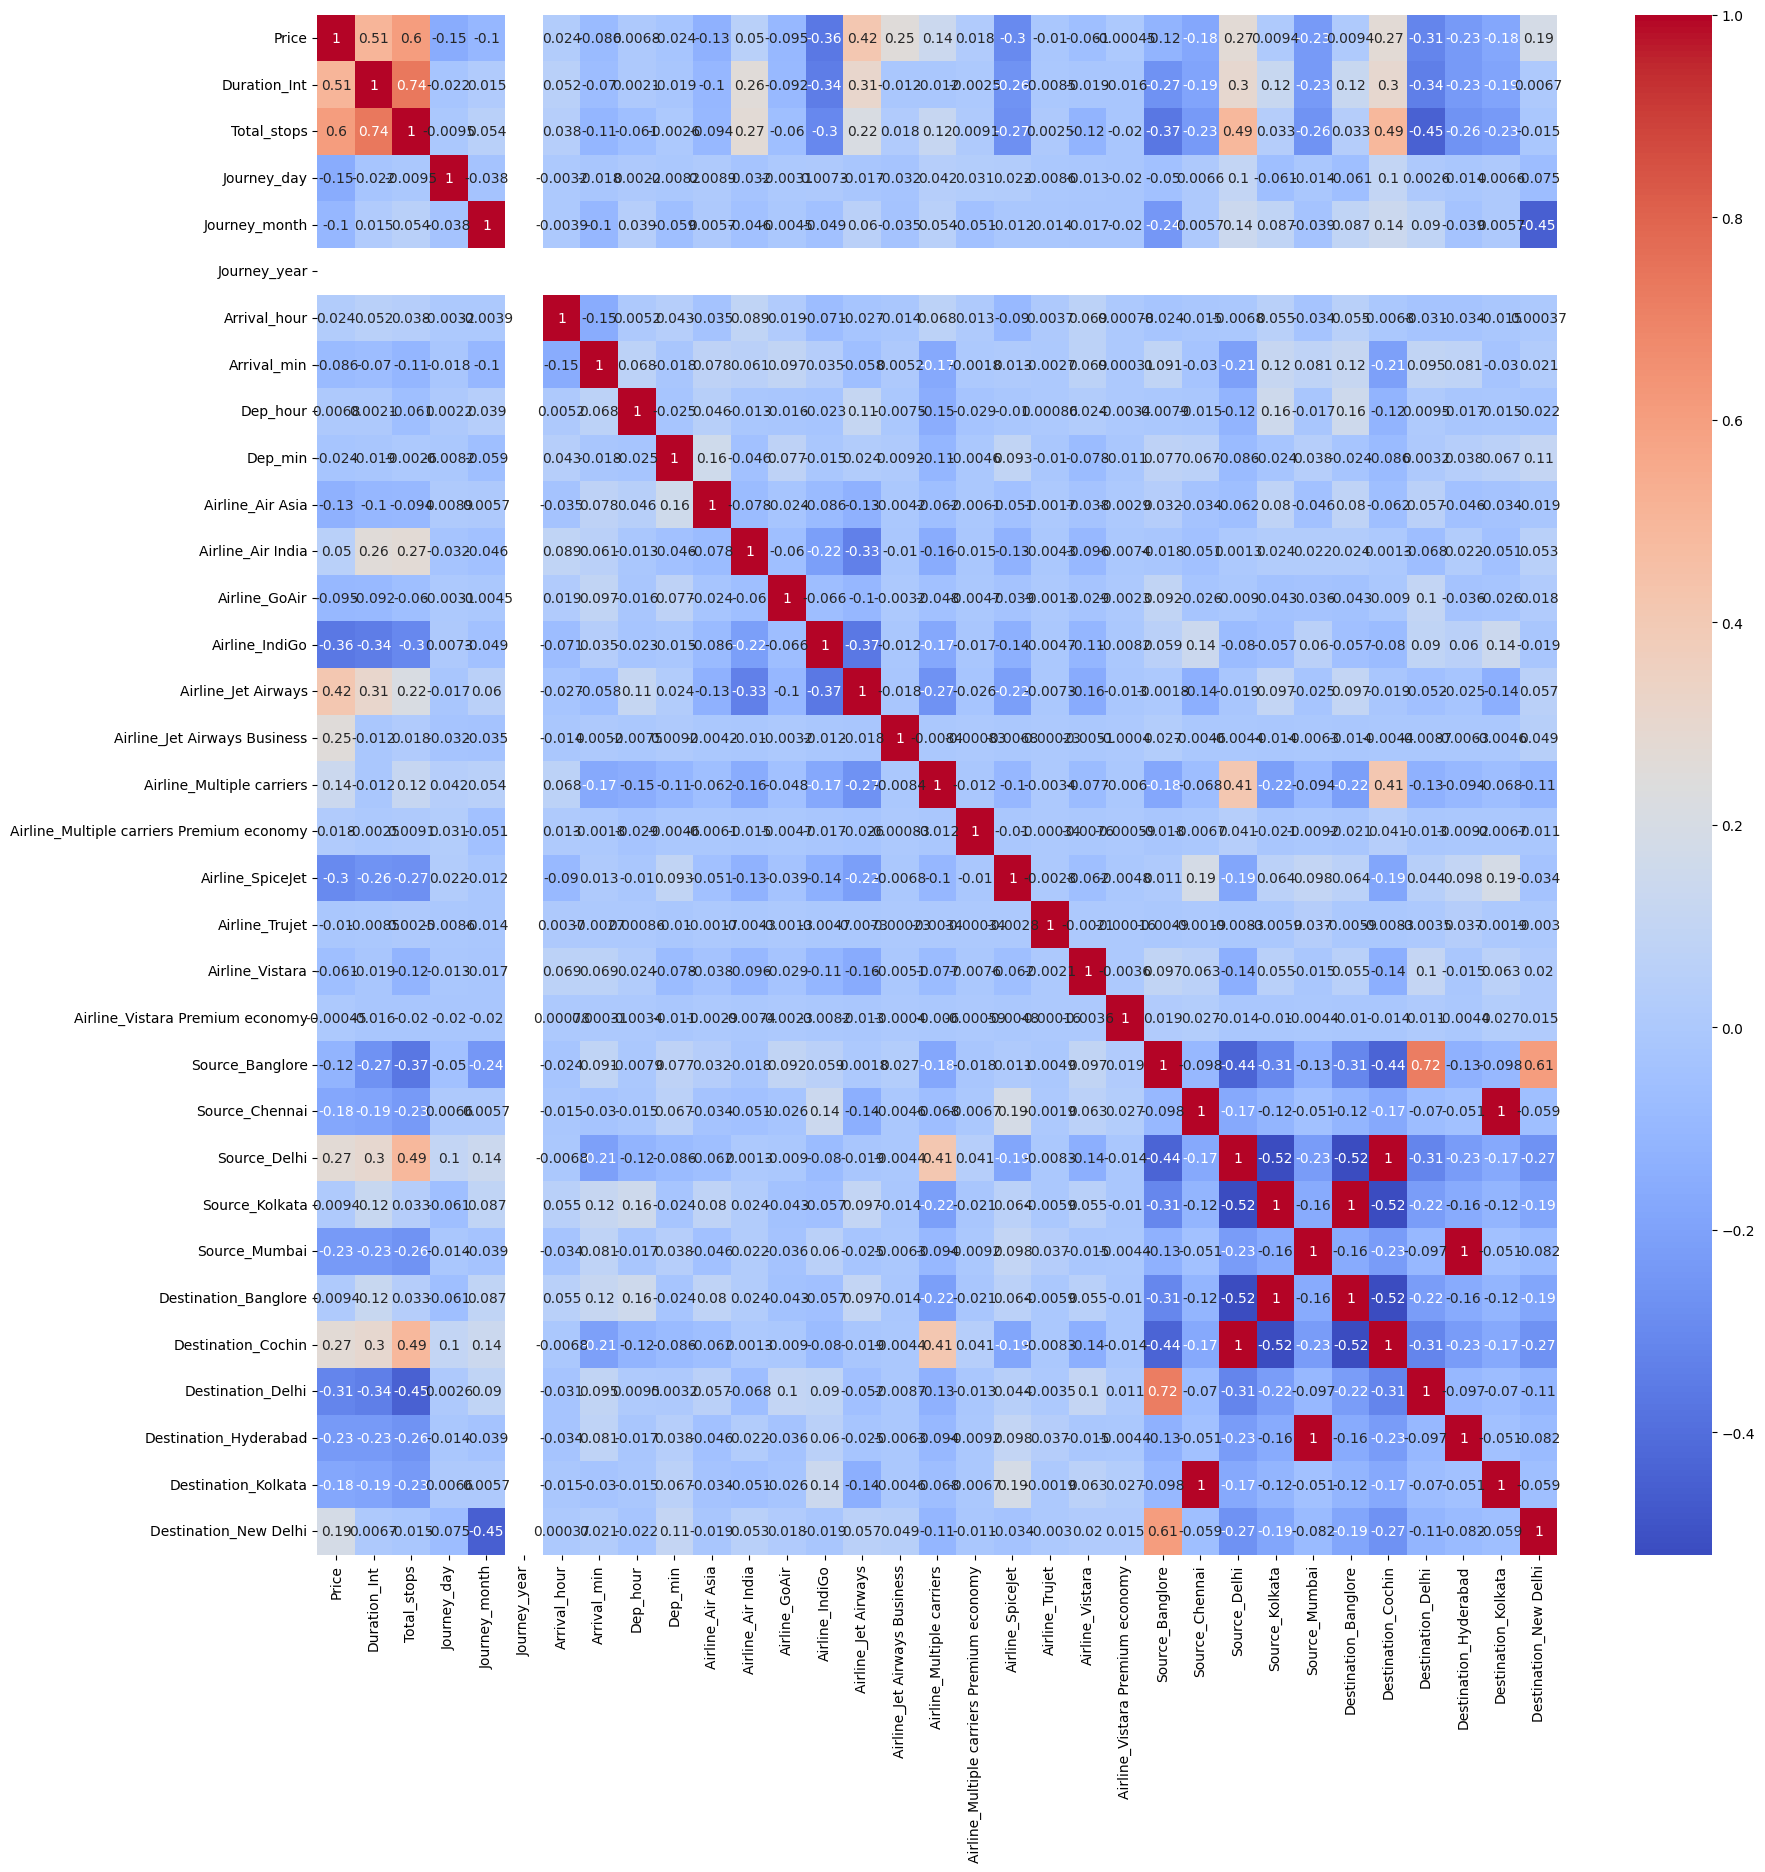

In [198]:
plt.figure(figsize=(20,20))
sns.heatmap(newdf.corr(), annot=True, cmap='coolwarm')

<Axes: xlabel='Duration_Int', ylabel='Price'>

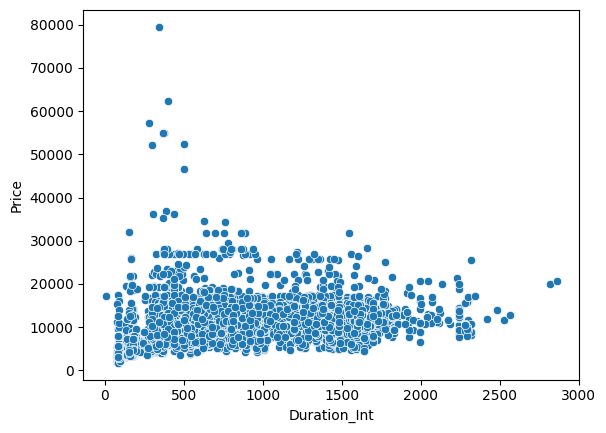

In [200]:
sns.scatterplot(x='Duration_Int', y='Price', data=newdf)

<Axes: xlabel='Price', ylabel='Count'>

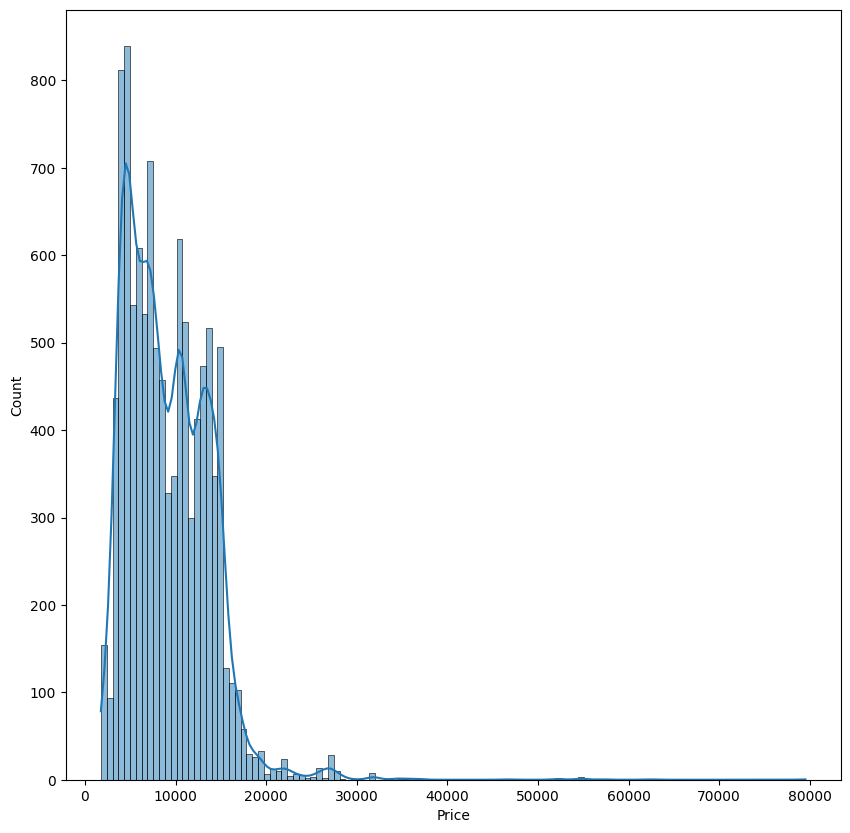

In [210]:
plt.figure(figsize=(10,10))
sns.histplot(newdf['Price'],kde=True)